# Homework 9

## Problem 13

We have to use an SVM with an RBF Kernel with parameters $\gamma = 1.5$ and $ C = \infty$ (hard-margin SVM). The goal is to count how many times we get a data set that is not separable by the RBF Kernel.

The target function is $f(x) = \text{sign} \left(x_2 - x_1 + 0.25 \sin(\pi x_1) \right)$

In each run we generate 100 training points from $\mathbf{X} = [-1,1] \times [-1,1]$. We use as many runs as needed to get a stable answer.

## 13.1 Import libraries

In [1]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.style as style
style.use('bmh')

# suppress scientific notation
np.set_printoptions(suppress=True)

## 13.2 Generate training data

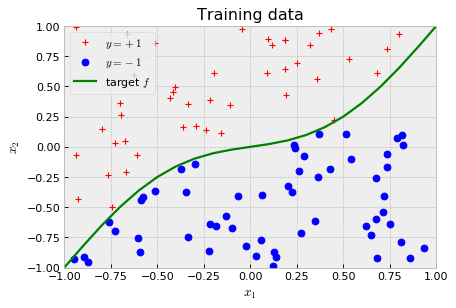

In [2]:
N_train = 100
x1 = np.random.uniform(-1,1,N_train)
x2 = np.random.uniform(-1,1,N_train)
y_train = np.sign(x2 - x1 + 0.25 * np.sin(np.pi * x1))
X_train = np.c_[x1, x2]

# set dpi
fig1 = plt.figure(1, dpi=80)

# plot the training data
plt.plot(x1[y_train == 1], x2[y_train == 1], 'r+', label='$y=+1$')
plt.plot(x1[y_train == -1], x2[y_train == -1], 'bo', label='$y=-1$')

# plot the decision boundary with f(x1,x2) = 0
x_values = np.arange(-1, 1.1, 0.1)
y_values = x_values - 0.25 * np.sin(np.pi * x_values)
plt.plot(x_values, y_values, 'g-', label='target $f$')


plt.title('Training data')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

## 13.3 Setting up the SVM classifier

For the **Support Vector Machine** we will use the [SVM class from scikit learn](http://scikit-learn.org/stable/modules/svm.html) (which internally uses `libsvm`).

In [ ]:
# set up the classifier
clf = svm.SVC(C = np.inf, kernel = 'rbf', gamma = 1.5)

# train the classifier
clf.fit(X_train, y_train)

# predict on training points
y_predict_train = clf.predict(X_train)

# compute in-sample error E_in
E_in = sum(y_predict_train != y_train) / N_train
print("In-sample error E_in:", E_in)



In-sample error E_in: 0.0


## 13.4 Repeat experiment over several runs

We count how many times we get an in-sample error that is greater than zero.

In [ ]:
N_train = 100
RUNS = 1000
E_in_nonzero_counter = 0
run_counter = 0


while run_counter < RUNS:
    
    # generate training data
    x1 = np.random.uniform(-1,1,N_train)
    x2 = np.random.uniform(-1,1,N_train)
    y_train = np.sign(x2 - x1 + 0.25 * np.sin(np.pi * x1))
    X_train = np.c_[x1, x2]
    
    
    # set up the classifier
    clf = svm.SVC(C = np.inf, kernel = 'rbf', gamma = 1.5)

    # train the classifier
    clf.fit(X_train, y_train)

    # predict on training points
    y_predict_train = clf.predict(X_train)

    # compute in-sample error E_in
    E_in = sum(y_predict_train != y_train) / N_train
    if E_in > 0: E_in_nonzero_counter += 1
    
    run_counter += 1
    

print("In {} runs E_in was nonzero {} times".format(RUNS, E_in_nonzero_counter))
print("That means E_in was nonzero {} % of the time".format(E_in_nonzero_counter / RUNS * 100))

## 13.5 Result

$E_{in}$ was nonzero $0\%$ of the time. This was to be expected since the hard-margin SVM by construction has no misclassified points on the training set. So the correct answer is **13[a]**.